In [15]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import random

In [16]:
dataset = np.genfromtxt('data.csv', delimiter = ",")
df_data = pd.DataFrame(dataset)
df_data.corr()


,0,1,2
0,1.000000,0.061353,0.000838
1,0.061353,1.000000,0.068621
2,0.000838,0.068621,1.000000


In [17]:
df_data.head(20)

,0,1,2
0,NaN,NaN,NaN
1,10.0,497.011658,22.697266
2,11.0,467.929018,85.654936
3,100.0,687.636705,37.409815
4,101.0,721.282777,61.604756
5,110.0,464.347767,46.354707
6,111.0,445.845391,75.481173
7,1000.0,891.713176,33.497447
8,1010.0,706.191923,21.543596
9,1011.0,445.557630,12.870775


In [18]:
dataset = dataset[:, [0,1,1]]

In [19]:
random.shuffle(dataset)
split = int(0.8 * len(dataset))
train_data = dataset[:split]
test_data = dataset[split:]

In [20]:
train_data = train_data[:, [0,1,1]]
test_data = test_data[:, [0,1,1]]

In [21]:
def calculate_euclidean_distance(training_features, query_features):
    return np.sqrt(np.sum(np.square(query_features-training_features), axis=1))

In [22]:
def predict(train_data, test_data):
    k = 5
    distances = calculate_euclidean_distance(train_data[:, 0:-1], test_data[0:-1])
    
    indices = np.argsort(distances)
    predicted_value = np.mean(train_data[indices[0:k], -1])
    
    return predicted_value

In [23]:
def calculate_r2(actual_target_values, predicted_target_values):
    sum_squared_residuals = np.sum(np.square(predicted_target_values - actual_target_values))
    sum_squares = np.sum(np.square(np.mean(actual_target_values) - actual_target_values))
    
    r2 = 1 - (sum_squared_residuals / sum_squares)
    
    return r2

In [24]:
def count_errors(actual_target_values, predicted_target_values, threshold):
    errors = np.abs(predicted_target_values - actual_target_values) > threshold
    return np.sum(errors)

In [25]:
start_time = time.process_time()

predictions = []

for i in range(len(test_data)):
    predicted_value = predict(train_data, test_data[i])
    predictions.append(predicted_value)  

r2_score = calculate_r2(test_data[:, -1], np.array(predictions))
threshold = 0.01 
number_of_errors = count_errors(test_data[:, -1], predictions, threshold)

end_time = time.process_time()

print("R2 Score is: ", r2_score)
print("Number of errors:", number_of_errors)
print("Time taken: ", end_time-start_time)

R2 Score is:  0.8962209207871924
Number of errors: 3953
Time taken:  2.8125


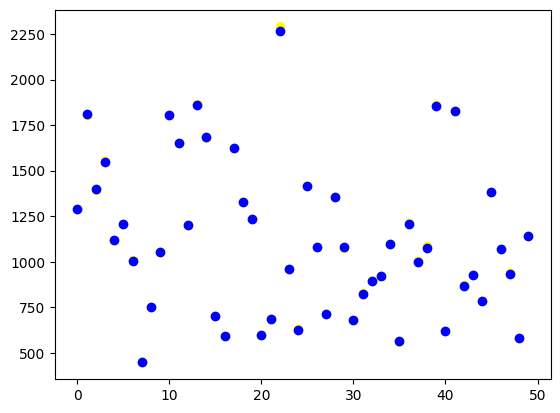

In [26]:
plt.scatter(np.arange(50), test_data[0:50, -1], color= 'yellow')
plt.scatter(np.arange(50), predictions[0:50], color= 'blue')

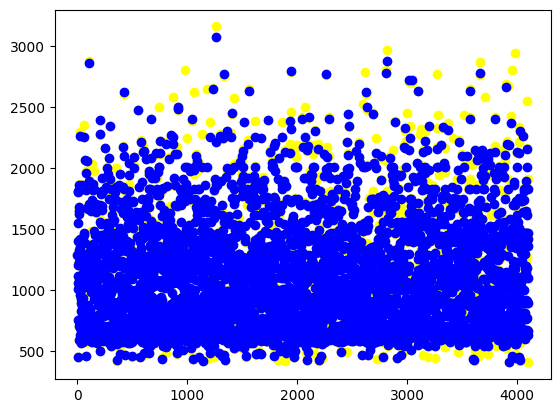

In [27]:
plt.scatter(np.arange(len(test_data)), test_data[:, -1], color= 'yellow')
plt.scatter(np.arange(len(test_data)), predictions, color= 'blue')